# Module - 6 Clustering for Diversification analysis
Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame()

In [3]:
large = 'AXISBANK,CIPLA,HDFCBANK,INFRATEL,INFY,ITC,LT,M&M,RELIANCE,TITAN'
mid = 'ADANIPOWER,APOLLOTYRE,BERGEPAINT,GMRINFRA,IDBI,IGL,JINDALSTEL,MINDTREE,RELINFRA,TATAPOWER'
small = 'BOMDYEING,FORTIS,IDFC,JETAIRWAYS,LALPATHLAB,NCC,PVR,RAYMOND,RCOM,SUZLON'

In [4]:
large = large.split(',')
mid = mid.split(',')
small = small.split(',')

In [5]:
for x in large:
    df[x] = pd.read_csv("Datasets/LARGE_CAP/"+x+".csv", sep=',', usecols=['Close Price'], squeeze=True)

In [6]:
for x in mid:
    df[x] = pd.read_csv("Datasets/MID_CAP/"+x+".csv", sep=',', usecols=['Close Price'], squeeze=True)

In [7]:
for x in small:
    df[x] = pd.read_csv("Datasets/SMALL_CAP/"+x+".csv", sep=',', usecols=['Close Price'], squeeze=True)

In [8]:
df.drop(494,inplace=True)

In [9]:
df['Date'] = pd.read_csv("Datasets/MID_CAP/GMRINFRA.csv", sep=',', usecols=['Date'], squeeze=True)

In [10]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.set_index('Date')

In [11]:
df.tail()

,AXISBANK,CIPLA,HDFCBANK,INFRATEL,INFY,ITC,LT,M&M,RELIANCE,TITAN,...,BOMDYEING,FORTIS,IDFC,JETAIRWAYS,LALPATHLAB,NCC,PVR,RAYMOND,RCOM,SUZLON
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-07,747.45,564.50,1975.15,268.00,723.60,304.25,1366.60,645.90,1384.90,1145.05,...,121.45,136.35,37.75,127.30,1024.95,97.55,1802.30,808.95,2.1,6.35
2019-05-08,741.85,563.35,2004.30,266.70,718.40,307.00,1360.35,645.80,1343.50,1082.85,...,119.35,135.20,37.10,131.35,1013.10,96.75,1780.10,807.10,2.2,5.95
2019-05-09,735.50,557.95,2013.90,267.10,724.55,301.90,1356.45,638.50,1299.45,1086.50,...,117.75,133.60,37.60,147.40,1006.10,93.70,1748.50,805.30,2.3,5.65
2019-05-10,731.00,558.00,2012.45,262.25,719.35,300.65,1355.50,636.00,1256.45,1088.70,...,117.05,133.00,37.60,151.75,982.90,92.65,1758.45,804.40,2.4,6.40
2019-05-13,735.05,557.75,2018.75,265.45,721.05,299.85,1317.65,621.65,1251.15,1104.45,...,109.85,131.90,38.10,139.10,980.65,93.60,1715.40,779.35,2.3,5.60


## Query 6.2 
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [12]:
returns = df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std() * sqrt(252)

In [13]:
returns

,Returns,Volatility
AXISBANK,0.235246,0.277896
CIPLA,0.021976,0.254183
HDFCBANK,0.166872,0.256821
INFRATEL,-0.124187,0.306023
INFY,-0.022672,0.418963
ITC,0.064014,0.223863
LT,-0.085904,0.314323
M&M,-0.269158,0.440357
RELIANCE,0.095121,0.439091
TITAN,0.473109,0.324361


## Query 6.3 
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

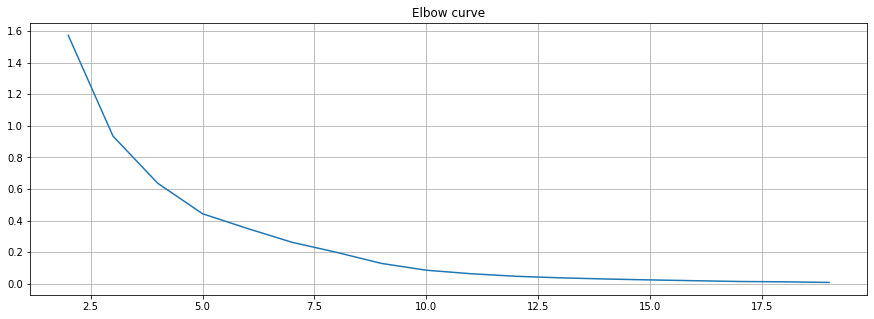

In [14]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

#### 7 Clusters

## Query 6.4
 Prepare a separate Data frame to show which stocks belong to the same cluster 

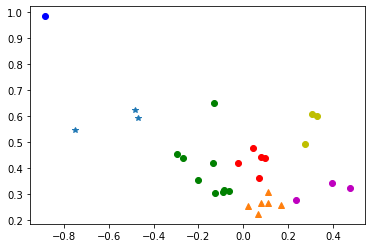

In [15]:
#computing K-Means with K = 7 (7 clusters)
centroids,_ = kmeans(data,7)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'*',
     data[idx==6,0],data[idx==6,1],'^')
#plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [16]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [17]:
df2 = pd.DataFrame()

In [18]:
df2['Name'] = returns.index
df2['Cluster'] = idx

In [19]:
df2

,Name,Cluster
0,AXISBANK,4
1,CIPLA,6
2,HDFCBANK,6
3,INFRATEL,3
4,INFY,2
5,ITC,6
6,LT,3
7,M&M,3
8,RELIANCE,2
9,TITAN,4
